In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
nyc_cd = gpd.read_file('../data/Community_Districts.geojson')
print(nyc_cd.crs)
nyc_cd.head()

epsg:4326


,boro_cd,shape_area,shape_leng,geometry
0,206,42664311.5086,35875.7117328,"MULTIPOLYGON (((-73.87185 40.84376, -73.87192 ..."
1,404,65739661.969,37018.3738392,"MULTIPOLYGON (((-73.84751 40.73901, -73.84801 ..."
2,304,56662613.1611,37007.806599,"MULTIPOLYGON (((-73.89647 40.68234, -73.89653 ..."
3,205,38316975.1292,29443.0481287,"MULTIPOLYGON (((-73.89138 40.86170, -73.89142 ..."
4,207,53311689.1,44812.1474256,"MULTIPOLYGON (((-73.87519 40.87158, -73.87619 ..."


In [3]:
nyc_cd.columns = ['Community_District','shape_area','shape_leng','geometry']

In [4]:
nyc_cd.head()

,Community_District,shape_area,shape_leng,geometry
0,206,42664311.5086,35875.7117328,"MULTIPOLYGON (((-73.87185 40.84376, -73.87192 ..."
1,404,65739661.969,37018.3738392,"MULTIPOLYGON (((-73.84751 40.73901, -73.84801 ..."
2,304,56662613.1611,37007.806599,"MULTIPOLYGON (((-73.89647 40.68234, -73.89653 ..."
3,205,38316975.1292,29443.0481287,"MULTIPOLYGON (((-73.89138 40.86170, -73.89142 ..."
4,207,53311689.1,44812.1474256,"MULTIPOLYGON (((-73.87519 40.87158, -73.87619 ..."


In [5]:
type(nyc_cd)

geopandas.geodataframe.GeoDataFrame

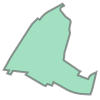

In [6]:
nyc_cd.loc[0, 'geometry']

In [7]:
print(nyc_cd.loc[0, 'geometry'])

MULTIPOLYGON (((-73.8718461029101 40.84376077785583, -73.87191691517283 40.84345374264658, -73.87196432156817 40.84323825377388, -73.87213357846727 40.842497794549, -73.87231748546176 40.84169028202043, -73.87234056327031 40.8415836261895, -73.87236365249346 40.84147696098339, -73.87239558060885 40.84133637543188, -73.872527839146 40.84075398300686, -73.87267805874693 40.84013719710676, -73.87277204658531 40.83975128233606, -73.87298042939128 40.83895248518574, -73.87312728158687 40.83833509641596, -73.87314714674842 40.83826389897314, -73.87317603928548 40.83816583089295, -73.87332746697363 40.83765194933224, -73.87334834302327 40.83759200855819, -73.8735176630578 40.83711442819023, -73.87359053263883 40.83689652518782, -73.87361760595988 40.83681877899325, -73.8737582282926 40.83639819478505, -73.87377308806087 40.83635875143833, -73.87383696556059 40.83636111808446, -73.87389295864384 40.83636341241558, -73.87425833254026 40.83637900224392, -73.87507837210686 40.83642309897043, -73.

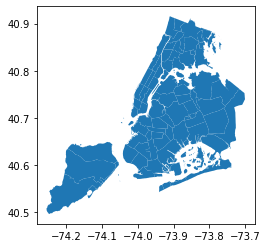

In [8]:
nyc_cd.plot();

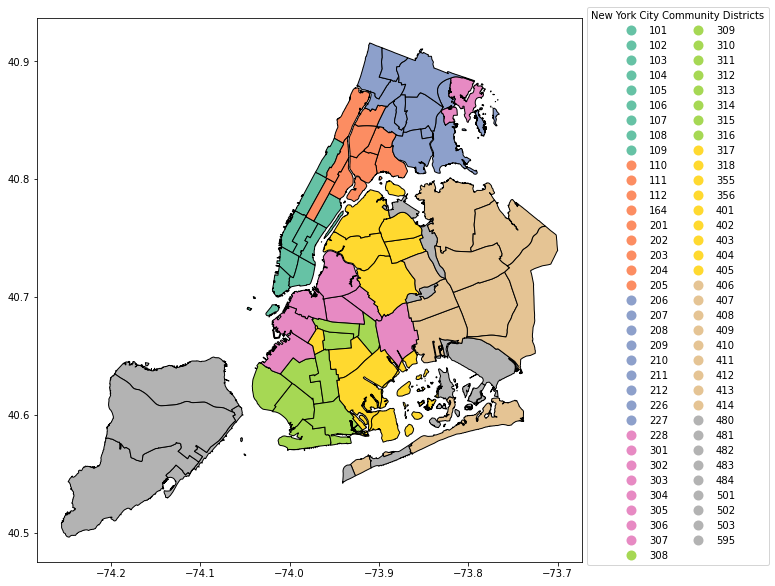

In [9]:
leg_kwds = {'title': 'New York City Community Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

nyc_cd.plot(column = 'Community_District', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [10]:
farmers_market = pd.read_csv('../data/DOHMH_Farmers_Markets.csv')
print(farmers_market.shape)
farmers_market.head(3)

(138, 15)


,Borough,Market_Name,Street_Address,Community_District_Full_Name,Community_District,Latitude,Longitude,Days_of_Operation,Hours_of_Operations,Season_Dates,Accepts_EBT,Open_Year_Round,Stellar_Cooking_Demonstrations,Food_Activities_for_Kids,Location_Point
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,Brooklyn Community District 6,306,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)"
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,Manhattan Community District 7,107,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,No,No,"(40.801155, -73.959647)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,Bronx Community District 4,204,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,8/12/20-11/25/20,Yes,No,No,No,"(40.839882, -73.916783)"


In [11]:
farmers_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Borough                         138 non-null    object 
 1   Market_Name                     138 non-null    object 
 2   Street_Address                  138 non-null    object 
 3   Community_District_Full_Name    138 non-null    object 
 4   Community_District              138 non-null    int64  
 5   Latitude                        138 non-null    float64
 6   Longitude                       138 non-null    float64
 7   Days_of_Operation               138 non-null    object 
 8   Hours_of_Operations             138 non-null    object 
 9   Season_Dates                    137 non-null    object 
 10  Accepts_EBT                     137 non-null    object 
 11  Open_Year_Round                 138 non-null    object 
 12  Stellar_Cooking_Demonstrations  138 

In [12]:
farmers_market['geometry'] = farmers_market.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
farmers_market.head(3)

,Borough,Market_Name,Street_Address,Community_District_Full_Name,Community_District,Latitude,Longitude,Days_of_Operation,Hours_of_Operations,Season_Dates,Accepts_EBT,Open_Year_Round,Stellar_Cooking_Demonstrations,Food_Activities_for_Kids,Location_Point,geometry
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,Brooklyn Community District 6,306,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)",POINT (-73.90819399999999 40.670986)
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,Manhattan Community District 7,107,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,No,No,"(40.801155, -73.959647)",POINT (-73.959647 40.801155)
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,Bronx Community District 4,204,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,8/12/20-11/25/20,Yes,No,No,No,"(40.839882, -73.916783)",POINT (-73.916783 40.839882)


In [13]:
nyc_cd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
fm_geo = gpd.GeoDataFrame(farmers_market, 
                           crs = nyc_cd.crs, 
                           geometry = farmers_market['geometry'])

In [15]:
type(fm_geo)

geopandas.geodataframe.GeoDataFrame

In [16]:
nyc_cd = nyc_cd[['Community_District', 'geometry']]

In [17]:
fm_cd = gpd.sjoin(fm_geo, nyc_cd , op = 'within')

In [18]:
fm_cd.head()

,Borough,Market_Name,Street_Address,Community_District_Full_Name,Community_District_left,Latitude,Longitude,Days_of_Operation,Hours_of_Operations,Season_Dates,Accepts_EBT,Open_Year_Round,Stellar_Cooking_Demonstrations,Food_Activities_for_Kids,Location_Point,geometry,index_right,Community_District_right
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,Brooklyn Community District 6,306,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)",POINT (-73.90819 40.67099),20,316
13,Brooklyn,Isabahlia Farm Stand,514 Rockaway Ave,Brooklyn Community District 16,316,40.667554,-73.910207,Friday & Saturday,(F) 9am - 4pm\n(S) 9am-3pm,06/29/2020-10/31/2020,Yes,No,No,No,"(40.667554, -73.910207)",POINT (-73.91021 40.66755),20,316
45,Brooklyn,Seeds in the Middle Fresh Food Box / Farmstand...,213 Osborn Street,Brooklyn Community District 16,316,40.667377,-73.908214,Friday,2pm-4:30pm,6/12/20-9/30/20,Yes,No,No,No,"(40.667377, -73.908214)",POINT (-73.90821 40.66738),20,316
48,Brooklyn,Isabahlia Farm Stand Winter Market,"93 New Lots Ave., inside greenhouse",Brooklyn Community District 16,316,40.657984,-73.901764,Saturday,8am-1pm,11/07/2020-12/19/2020,Yes,No,No,No,"(40.657984, -73.901764)",POINT (-73.90176 40.65798),20,316
68,Brooklyn,Project EATS Rockaway Farm Stand & CSA pickup,Rockaway Ave. & Livonia Ave.,Brooklyn Community District 16,316,40.662555,-73.908920,Friday,8 a.m. - 5 p.m.,09/01/2020-11/20/2020,Yes,No,No,No,"(40.662555, -73.90892)",POINT (-73.90892 40.66255),20,316


In [19]:
fm_cd['Community_District_left'].value_counts()

316    7
301    6
101    6
306    5
112    5
103    5
206    5
204    5
110    4
414    4
207    4
111    4
107    4
201    3
303    3
401    3
208    3
109    3
104    3
305    3
304    3
409    2
317    2
501    2
302    2
413    2
108    2
203    2
102    2
312    2
314    2
407    2
105    2
404    2
307    2
212    2
209    1
315    1
308    1
502    1
202    1
310    1
313    1
405    1
403    1
210    1
211    1
355    1
311    1
402    1
408    1
106    1
309    1
412    1
406    1
Name: Community_District_left, dtype: int64

In [20]:
fm_cd['Community_District_right'].value_counts()

316    8
301    6
204    6
101    6
112    5
207    5
414    4
111    4
206    4
103    4
107    4
110    4
306    3
303    3
104    3
109    3
305    3
208    3
304    3
401    3
102    2
203    2
501    2
409    2
413    2
302    2
201    2
317    2
312    2
108    2
314    2
106    2
407    2
105    2
307    2
355    2
212    2
404    2
313    1
310    1
502    1
405    1
308    1
202    1
309    1
210    1
311    1
412    1
211    1
209    1
408    1
402    1
403    1
315    1
406    1
Name: Community_District_right, dtype: int64

After doing a value counts and sannity check via Google maps and the NYC government webiste we see that Community_District_right is the correct column and we can drop Community_District_left

In [21]:
fm_cd = fm_cd.drop(columns=['Community_District_left'])

In [22]:
fm_cd.head()

,Borough,Market_Name,Street_Address,Community_District_Full_Name,Latitude,Longitude,Days_of_Operation,Hours_of_Operations,Season_Dates,Accepts_EBT,Open_Year_Round,Stellar_Cooking_Demonstrations,Food_Activities_for_Kids,Location_Point,geometry,index_right,Community_District_right
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,Brooklyn Community District 6,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)",POINT (-73.90819 40.67099),20,316
13,Brooklyn,Isabahlia Farm Stand,514 Rockaway Ave,Brooklyn Community District 16,40.667554,-73.910207,Friday & Saturday,(F) 9am - 4pm\n(S) 9am-3pm,06/29/2020-10/31/2020,Yes,No,No,No,"(40.667554, -73.910207)",POINT (-73.91021 40.66755),20,316
45,Brooklyn,Seeds in the Middle Fresh Food Box / Farmstand...,213 Osborn Street,Brooklyn Community District 16,40.667377,-73.908214,Friday,2pm-4:30pm,6/12/20-9/30/20,Yes,No,No,No,"(40.667377, -73.908214)",POINT (-73.90821 40.66738),20,316
48,Brooklyn,Isabahlia Farm Stand Winter Market,"93 New Lots Ave., inside greenhouse",Brooklyn Community District 16,40.657984,-73.901764,Saturday,8am-1pm,11/07/2020-12/19/2020,Yes,No,No,No,"(40.657984, -73.901764)",POINT (-73.90176 40.65798),20,316
68,Brooklyn,Project EATS Rockaway Farm Stand & CSA pickup,Rockaway Ave. & Livonia Ave.,Brooklyn Community District 16,40.662555,-73.908920,Friday,8 a.m. - 5 p.m.,09/01/2020-11/20/2020,Yes,No,No,No,"(40.662555, -73.90892)",POINT (-73.90892 40.66255),20,316


In [23]:
fm_316 = fm_cd.loc[fm_cd['Community_District_right'] == '316']
fm_316.shape                       

(8, 17)

In [24]:
polygon_316 = nyc_cd.loc[nyc_cd['Community_District']=='316']
polygon_316.shape

(1, 2)

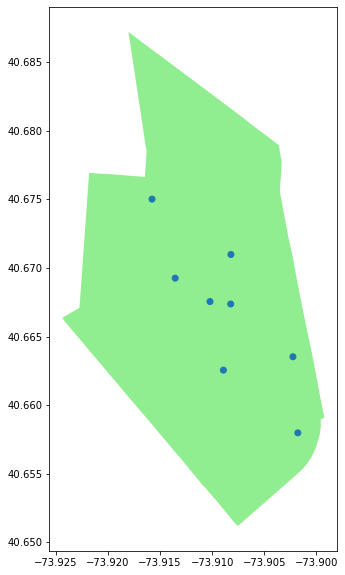

In [25]:
ax = polygon_316.plot(figsize = (8, 10), color = 'lightgreen')
fm_316.plot( ax = ax, column = 'Community_District_right');
plt.show();

In [26]:
polygon_316.centroid

C:\Users\ljcoo\AppData\Local\Temp\ipykernel_18888\3685660152.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon_316.centroid


20    POINT (-73.91094 40.66816)
dtype: geometry

In [27]:
center = polygon_316.geometry.centroid[20]

C:\Users\ljcoo\AppData\Local\Temp\ipykernel_18888\1584105606.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon_316.geometry.centroid[20]


In [28]:
area_center = [center.y, center.x]
print(area_center)

[40.668155996297536, -73.91094339776227]


In [29]:
map_316 = folium.Map(location =  area_center, zoom_start = 12)
map_316

In [30]:
i = 0
for row_index, row_values in fm_316.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Borough                                                                    Brooklyn
Market_Name                       Teens for Food Justice Fresh Food Box & Farmst...
Street_Address                                                    85 Watkins Street
Community_District_Full_Name                          Brooklyn Community District 6
Latitude                                                                  40.670986
Longitude                                                                -73.908194
Days_of_Operation                                                           Tuesday
Hours_of_Operations                                                           4-6pm
Season_Dates                                                             Year-round
Accepts_EBT                                                                      No
Open_Year_Round                                                                 Yes
Stellar_Cooking_Demonstrations                     

In [31]:
#draw our Brooklyn Community District: 316
map_316 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon_316).add_to(map_316)

#iterate through fm_316 to create locations and markers 
#for each farmers market
#remember for Folium locations, lat is listed first!!

for row_index, row_values in fm_316.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Market_Name'])
    icon=folium.Icon(color="green",icon="leaf", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_316)
map_316.save('../maps/farmersmarketmap316.html')

#display our map
map_316

In [32]:
folium.Map?

In [33]:
cluster_map_316 = folium.Map(location =  area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_316)

folium.GeoJson(polygon_316).add_to(cluster_map_316)

for row_index, row_values in fm_316.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Market_Name'])
    icon=folium.Icon(color="green",icon="leaf", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

cluster_map_316.save('../maps/clusterfm316.html')

cluster_map_316

In [34]:
cluster_map_nycfm = folium.Map(location =  area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_nycfm)

for row_index, row_values in fm_cd.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Market_Name'])
    icon=folium.Icon(color="green",icon="leaf", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

cluster_map_nycfm.save('../maps/clusternycfm.html')

cluster_map_nycfm